**Latent Space**

- Get the latent spacelayer prediction for every image, and export those vectors.

- We are then going to compare those vectors to find similar images

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Input, Dense, Reshape, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import pickle
import pandas as pd
from difflib import SequenceMatcher
import os

In [4]:
# Create model with latent space layer
autoencoder = load_model('/content/drive/MyDrive/models/image_autoencoder_2.h5', compile=False)
latent_space_model = Model(autoencoder.input, autoencoder.get_layer('latent_space').output)

In [6]:
# Load all images and predict them with the latent space model
X = []
indices = []

for i in tqdm(range(len(os.listdir('/content/drive/MyDrive/flipkart/data/images')))):
  try:
    img_name = os.listdir('/content/drive/MyDrive/flipkart/data/images')[i]
    img = load_img('/content/drive/MyDrive/flipkart/data/images/{}'.format(img_name), target_size = (256, 256))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    pred = latent_space_model.predict(img)
    pred = np.resize(pred, (16))
    X.append(pred)
    indices.append(img_name)

    # Export the embeddings
    if i in [1,10,100,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,12000,13000,14000,15000,16000,17000,18000,19000]:
      embeddings = {'indices': indices, 'features': np.array(X)}

      pickle.dump(embeddings, open('/content/drive/MyDrive/flipkart/image_embeddings_2.pickle', 'wb'))

  except:
    print(img_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [8]:
# Export the embeddings
embeddings = {'indices': indices, 'features': np.array(X)}

pickle.dump(embeddings, open('/content/drive/MyDrive/flipkart/image_embeddings_2.pickle', 'wb'))

**Image Similarity**
 - We will use the euclidean distance of the vectors to get the similar images



In [9]:
def eucledian_distance(x,y):
  eucl_dist = np.linalg.norm(x - y)
  return eucl_dist

def category_similarity(x,y):
  return SequenceMatcher(None, x, y).ratio()

In [10]:
# Load embeddings
embeddings = pickle.load(open('/content/drive/MyDrive/flipkart/image_embeddings_2.pickle', 'rb'))

# Load images metadata
metadata = pd.read_csv('/content/drive/MyDrive/flipkart/metadata.csv')

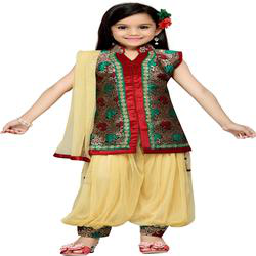

In [18]:
# Get image name
img_name = os.listdir('/content/drive/MyDrive/flipkart/data/images')[3]
img = load_img('/content/drive/MyDrive/flipkart/data/images/{}'.format(img_name), target_size=(256, 256))
img

Image Category: ["Baby Care >> Infant Wear >> Baby Girls' Clothes >> Ethnic Wear >> Salwar Kurta Dupattas >> Aarika Salwar Kurta Dupattas >> Aarika Self Design Kurta & Patiyala"]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


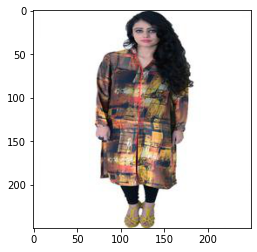

Image Category: ["Clothing >> Women's Clothing >> Ethnic Wear >> Kurtas & Kurtis >> Kurtas >> Embellish outfits Kurtas >> Embellish outfits Graphic Print Women's Straight..."]
Euclidean Distance: 6560.20849609375
Category Distance: 0.4485981308411215


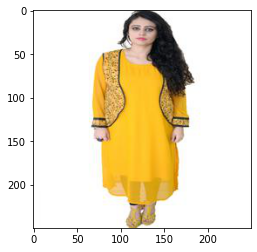

Image Category: ["Clothing >> Women's Clothing >> Ethnic Wear >> Kurtas & Kurtis >> Kurtas >> Embellish outfits Kurtas >> Embellish outfits Embroidered Women's Straight K..."]
Euclidean Distance: 6981.10400390625
Category Distance: 0.4485981308411215


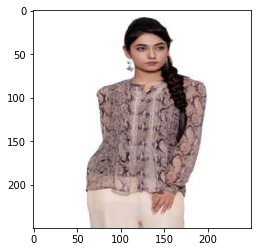

Image Category: ["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Shirts >> Lamora Shirts"]
Euclidean Distance: 8114.87646484375
Category Distance: 0.44274809160305345


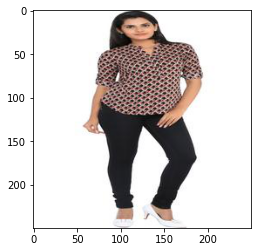

Image Category: ["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Mangosteen Tops"]
Euclidean Distance: 7562.5771484375
Category Distance: 0.40458015267175573


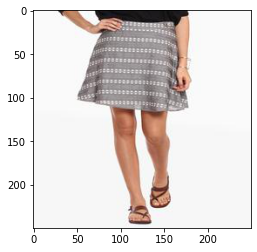

Image Category: ["Clothing >> Women's Clothing >> Western Wear >> Dresses & Skirts >> Skirts >> American Swan Skirts >> American Swan Solid Women's Regular Skirt"]
Euclidean Distance: 8052.81103515625
Category Distance: 0.40129449838187703


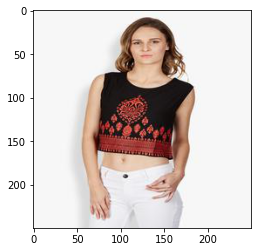

Image Category: ["Clothing >> Women's Clothing >> Western Wear >> Shirts, Tops & Tunics >> Tops >> Folklore Tops"]
Euclidean Distance: 7648.90185546875
Category Distance: 0.3923076923076923


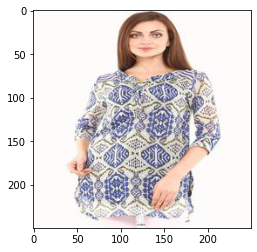

Image Category: ["Clothing >> Women's Clothing >> Fusion Wear >> Shirts, Tops & Tunics >> Tunics >> Mustard Tunics"]
Euclidean Distance: 8264.2001953125
Category Distance: 0.3893129770992366


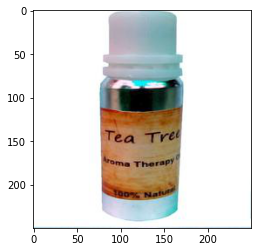

Image Category: ["Baby Care >> Baby Grooming >> Baby Massage Oils >> Shagun Gold Baby Massage Oils"]
Euclidean Distance: 7929.2275390625
Category Distance: 0.36585365853658536


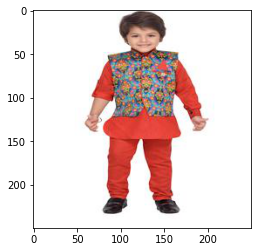

Image Category: ["Clothing >> Kids' Clothing >> Boys Wear >> Ethnic Wear >> Ethnic Sets >> AJ Dezines Ethnic Sets >> AJ Dezines Boy's Kurta, Waistcoat and Pyjama Set"]
Euclidean Distance: 5275.60498046875
Category Distance: 0.35782747603833864


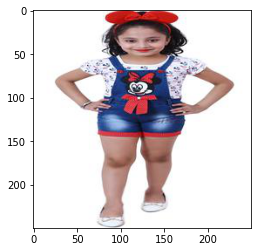

Image Category: ["Clothing >> Kids' Clothing >> Girls Wear >> Dungarees & Jumpsuits >> Dungarees >> Blinkin Dungarees >> Blinkin Girl's Blue Dungaree"]
Euclidean Distance: 6411.86328125
Category Distance: 0.3434343434343434


In [19]:
# Calculate eucledian distance
img_similarity = []
cat_similarity = []

# Get actual image embedding
img = img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)
pred = latent_space_model.predict(img)
pred = np.resize(pred, (16))
img_cat = metadata.query("id == '{}'".format(img_name.replace('.jpg','')))['category'].values[0]
print('Image Category: {}'.format(img_cat))

for i in tqdm(range(len(embeddings['indices']))):
  img_name = embeddings['indices'][i]

  # Calculate vectors distances
  dist = eucledian_distance(pred,embeddings['features'][i])
  img_similarity.append(dist)

  # Calculate categoy similarity
  cat = metadata.query("id == '{}'".format(img_name.replace('.jpg','')))['category'].values[0]
  cat_sim = category_similarity(img_cat, cat)
  cat_similarity.append(cat_sim)

imgs_result = pd.DataFrame({'img': embeddings['indices'],
                            'euclidean_distance': img_similarity,
                            'category_similarity': cat_similarity})


imgs_result = imgs_result.query('euclidean_distance > 0').sort_values(by='euclidean_distance', ascending=True).reset_index(drop=True)
imgs_result = imgs_result.iloc[0:20,:].sort_values(by='category_similarity', ascending=False).reset_index(drop=True)

# Show 10 first similar images
for i in range(10):
  image = load_img('/content/drive/MyDrive/flipkart/data/images/{}'.format(imgs_result['img'].values[i]))
  category = metadata.query("id == '{}'".format(imgs_result['img'].values[i].replace('.jpg','')))['category'].values[0]
  
  # Show image
  plt.imshow(image)
  plt.show()
  print('Image Category: {}'.format(category))
  print('Euclidean Distance: {}'.format(imgs_result['euclidean_distance'].values[i]))
  print('Category Distance: {}'.format(imgs_result['category_similarity'].values[i]))

In [20]:
imgs_result

,img,euclidean_distance,category_similarity
0,a1a5a1b9fa383ee2539beb86f5555577.jpg,6560.208496,0.448598
1,0b6cc00d548fd481eb7793c90fd955ce.jpg,6981.104004,0.448598
2,51d4f6da3403888499df89b73b3a60d4.jpg,8114.876465,0.442748
3,b5193246e2e756cb5a89c44a1179682e.jpg,7562.577148,0.404580
4,393c915a199638a6748bbe31c15cdb9e.jpg,8052.811035,0.401294
5,b8fce8cab1824ae0c7ae0a8588bb4aa2.jpg,7648.901855,0.392308
6,e95726ee4d3e11c574f00a3a67d2365b.jpg,8264.200195,0.389313
7,7bbcbd91b8865a9f7b254760e5e2e10a.jpg,7929.227539,0.365854
8,0611102bf46663abb28a560a7896f553.jpg,5275.604980,0.357827
9,e85779bd0769001554a0abbd16ddfb51.jpg,6411.863281,0.343434
